# README

1. Install Selenium
2. Install Web Driver yang digunakan (misal chrome install web driver chrome, misal edge instal web driver edge) - versinya sesuaikan dengan versi web appnya
3. Akses Maps Menggunakan Place Id (Search Place Id Finder buat cari id dari lokasi)
4. Inspect Element


### Import Library

In [53]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from itertools import zip_longest
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from googletrans import Translator



In [37]:
translator = Translator()

### Konfigurasi Web Driver

In [54]:
# Konfigurasi WebDriver
options = webdriver.EdgeOptions()
options.use_chromium = True
# options.add_argument("headless")  # Untuk menjalankan browser dalam mode headless
driver = webdriver.Edge(options=options)
wait = WebDriverWait(driver, 5)



### Tentukan target lokasi

In [56]:
# Buka halaman Google Maps berdasarkan place id
ahass_panglima_jaya = "ChIJy8o9kNH71y0RMPCH2a8jyIE"
ahass_mutiara_motor = "ChIJM7Q_Ns371y0RgsVCneDEVvw"
ahass_dinoyo = "ChIJC1wN5bD71y0RwmNs98Ch4OE"
itts = "ChIJHVqSy9H71y0RnwWbLgvLvh0"

# driver.get(f'https://www.google.com/maps/place/?q=place_id:{ahass_panglima_jaya}')
# driver.get(f'https://www.google.com/maps/place/?q=place_id:{ahass_mutiara_motor}')
driver.get(f'https://www.google.com/maps/place/?q=place_id:{ahass_dinoyo}')
# driver.get(f'https://www.google.com/maps/place/?q=place_id:{itts}')

###  Karena letak komen dan review ada di sidebar, pastikan elemen tersebut bisa kita akses

In [57]:
sidebar = wait.until(EC.presence_of_element_located((By.ID, 'QA0Szd')))

### Define Sidebar Konten untuk di scrool (karena sidebar ada 2 colom, colom button, dan kolom konten)

In [58]:
# Define the element to scroll
element_to_scroll = sidebar.find_element(By.CSS_SELECTOR, '#QA0Szd > div > div > div.w6VYqd > div.bJzME.tTVLSc > div > div.e07Vkf.kA9KIf > div > div')

### Define Fungsi untuk scrool

In [59]:
# Function to scroll to the element
def scroll_to_element(element):
    driver.execute_script("arguments[0].scrollIntoView(false);", element)
    
    time.sleep(5)  # Wait for 5 seconds after scrolling

### Scrool sampe button more review ditemukan

In [64]:
# Scroll until the "More reviews" button is visible
button_more_reviews = None
while not button_more_reviews:
    try:
        button_more_reviews = element_to_scroll.find_element(By.CSS_SELECTOR, 'div > button[aria-label*="ulasan lainnya" i], div > button[aria-label*="reviews" i]')
    except:
        scroll_to_element(element_to_scroll)

### Memastikan elemen button tampil dan siap di klik

In [65]:
# Scroll a bit more to ensure the button is fully visible
scroll_to_element(button_more_reviews)
time.sleep(5)

# Wait until the button is clickable
wait = WebDriverWait(driver, 5)
button_more_reviews = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'div > button[aria-label*="ulasan lainnya" i], div > button[aria-label*="reviews" i]')))


### Klik Button 

In [66]:
# Click the "More reviews" button
button_more_reviews.click()

### Define Sidebar Baru (setelah kita klik tombol reviews)

In [67]:
element_to_scroll = sidebar.find_element(By.CSS_SELECTOR, '#QA0Szd > div > div > div.w6VYqd > div.bJzME.tTVLSc > div > div.e07Vkf.kA9KIf > div > div > div.m6QErb.DxyBCb.kA9KIf.dS8AEf')

### Buat Fungsi baru untuk auto scrolling sampai bawah

In [68]:
# Fungsi untuk melakukan scroll ke bawah
def scroll_to_bottom(element):
    driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", element)
    time.sleep(10)  # Jeda 10 detik setelah melakukan scroll


### Jalankan auto scrooling sampai limit scrool habis/ pentokin

In [69]:
# Lakukan scroll ke bawah sampai mentok
limit_scrool = 2
while True:
    previous_height = driver.execute_script("return arguments[0].scrollHeight", element_to_scroll)
    scroll_to_bottom(element_to_scroll)
    current_height = driver.execute_script("return arguments[0].scrollHeight", element_to_scroll)
    if current_height == previous_height or limit_scrool == 0:
        break
    limit_scrool -= 1

### Cari elemen html yang mau kita cari dari komen section (nama-status-year-star-comments)

In [70]:
names = driver.find_elements(By.CSS_SELECTOR, 'div.d4r55')
status = driver.find_elements(By.CSS_SELECTOR, 'div.RfnDt')
year = driver.find_elements(By.CSS_SELECTOR, 'div.DU9Pgb span.rsqaWe')

star = driver.find_elements(By.CSS_SELECTOR, 'span.kvMYJc[aria-label*="stars"]')
if (len(star) < 1) : #buat validasi bahasa
    star = driver.find_elements(By.CSS_SELECTOR, 'span.kvMYJc[aria-label*="bintang"]')

comments = driver.find_elements(By.CSS_SELECTOR, 'div.MyEned')

# for st in status:
#     print(len(st.text.split('·')))

In [74]:
names[0].text

'Agmarina Vica Mayelsa'

### Check sebelum insert

In [71]:
name_list = []
reviewer_status_list = []
total_reviews_list = []
year_list = []
star_list = []
comment_list = []

print("len names", len(names))
print("len status", len(status))
print("len year", len(year))
print("len star", len(star))
print("len comments", len(comments))

len names 19
len status 19
len year 19
len star 19
len comments 14


In [75]:

for name, stat, year, st, comment in zip_longest(names, status, year, star, comments, fillvalue=""):
    print("\nName:", name.text)
    name_list.append(name.text)
    # Karena pada status bisa mereturn status reviewer dan total jumlah review, jadi kita cleaning sekalian
    if len(stat.text.split('·')) == 2:
        print("Reviewer Status :", stat.text.split('·')[0])
        print("Total Reviews :", stat.text.split('·')[1])
        reviewer_status_list.append(stat.text.split('·')[0])
        total_reviews_list.append(stat.text.split('·')[1])
    else :
        # karena gak semua status memiliki status reviewer dan total jumlah review
        print("Status:", stat.text.split('·')[0])
        print("Reviewer Status:", "Non Local Guide")
        reviewer_status_list.append("Non Local Guide")
        total_reviews_list.append(stat.text.split('·')[0])
    print("Periode:", year.text)
    year_list.append(year.text)
    try:
        # Kita split karena outputnya adalah ex "4 Bintang"
        print("Star:", st.get_attribute('aria-label').split()[0])
        star_list.append(st.get_attribute('aria-label').split()[0])
    except:
        # Kadang setelah scrool tidak tergenerate semua htmlnya (antisipasi)
        print("Star: NaN")
        star_list.append(float('nan'))
    try :
        print("Comment:", comment.text) 
        comment_list.append(comment.text)
    except : 
        print("Comment: Comment not found") 
        comment_list.append("comment not found")
    print("---")


Name: Agmarina Vica Mayelsa
Reviewer Status : Local Guide 
Total Reviews :  56 ulasan
Periode: setahun lalu
Star: 5
Comment: Kesini hari minggu ternyata buka karena sempet muter2 tapi pada tutup huhu. Mbaknya sabar nanyain kita perlu apa aja perbaikannya. Terus disediakan air untuk minum bahkan bisa buat kopi sendiri. Mas mas mekaniknya juga sabar mendengarkan … Lainnya
---

Name: Seka Riye
Status: 1 ulasan
Reviewer Status: Non Local Guide
Periode: 2 minggu lalu
Star: 1
Comment: Awal cerita saya ke ahas, mengeluhkan vario 150 roda blakang goyang saat berkendara , karyawannya mau ngecek, kata karyawannya penyebabnya roda depan udah gundul dan harus di ganti, dan saya iyakan aja, dalam hati gimana ceritanya yang … Lainnya
---

Name: dini hidayah
Reviewer Status : Local Guide 
Total Reviews :  78 ulasan
Periode: 2 minggu lalu
Star: 5
Comment: Pelayanan cepat, antri pun ngga lama. Ganti oli garda dan sampingnya pun cakcek watwet. Lokasi pas depan pertamina jadi enak abis service bisa lans

### Insert ke data frame biar rapih

In [76]:
df = pd.DataFrame({
    'Name': name_list,
    'Reviewer Status': reviewer_status_list,
    'Total Reviews': total_reviews_list,
    'Year': year_list,
    'Star': star_list,
    'Comment': comment_list
})


In [77]:
df.head()

,Name,Reviewer Status,Total Reviews,Year,Star,Comment
0,Agmarina Vica Mayelsa,Local Guide,56 ulasan,setahun lalu,5,Kesini hari minggu ternyata buka karena sempet...
1,Seka Riye,Non Local Guide,1 ulasan,2 minggu lalu,1,"Awal cerita saya ke ahas, mengeluhkan vario 15..."
2,dini hidayah,Local Guide,78 ulasan,2 minggu lalu,5,"Pelayanan cepat, antri pun ngga lama. Ganti ol..."
3,typh,Local Guide,26 ulasan,sebulan lalu,1,"Rem belakang seret, piston d kasih stempet doa..."
4,Alfiah,Non Local Guide,2 ulasan,5 bulan lalu,5,Staff dan mechanic sangat ramah.. Disediain ai...


In [80]:
def hapus_ulasan(nilai):
    return nilai.split()[0]

# df['Total Reviews'] = df['Total Reviews'].apply(hapus_ulasan)
# df['Total Reviews'] = df['Total Reviews'].astype(int)

df.head()

,Name,Reviewer Status,Total Reviews,Year,Star,Comment
0,Agmarina Vica Mayelsa,Local Guide,56,setahun lalu,5,Kesini hari minggu ternyata buka karena sempet...
1,Seka Riye,Non Local Guide,1,2 minggu lalu,1,"Awal cerita saya ke ahas, mengeluhkan vario 15..."
2,dini hidayah,Local Guide,78,2 minggu lalu,5,"Pelayanan cepat, antri pun ngga lama. Ganti ol..."
3,typh,Local Guide,26,sebulan lalu,1,"Rem belakang seret, piston d kasih stempet doa..."
4,Alfiah,Non Local Guide,2,5 bulan lalu,5,Staff dan mechanic sangat ramah.. Disediain ai...


In [21]:
df['Star'].describe()

count     19
unique     5
top        5
freq      13
Name: Star, dtype: object

In [81]:
df['Reviewer Status'].value_counts()

Non Local Guide    11
Local Guide         8
Name: Reviewer Status, dtype: int64

In [82]:
df['Star'].value_counts()

5    13
1     3
3     1
2     1
4     1
Name: Star, dtype: int64

Text(0, 0.5, 'Count')

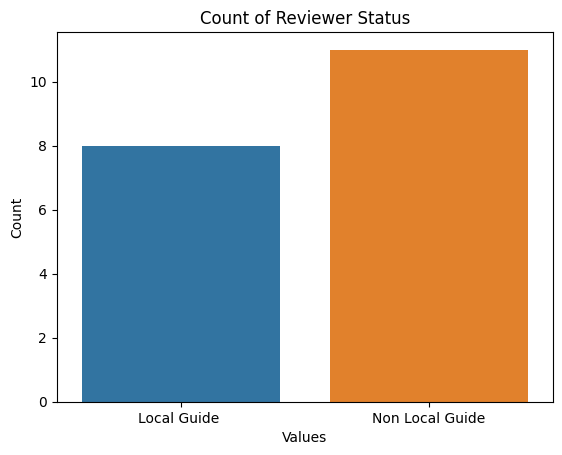

In [24]:
# Membuat count plot menggunakan seaborn
sns.countplot(data=df, x='Reviewer Status')

# Memberikan judul dan label sumbu
plt.title('Count of Reviewer Status')
plt.xlabel('Values')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

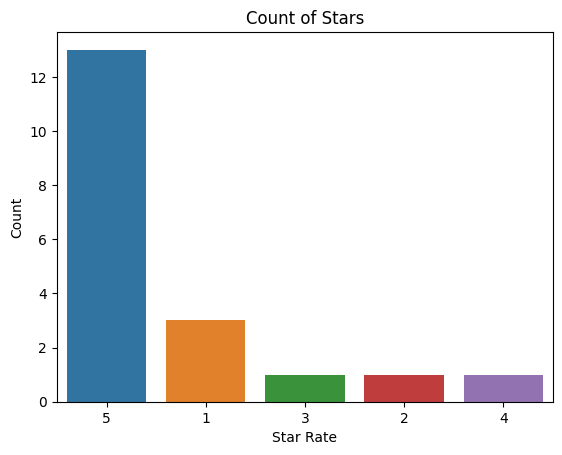

In [25]:
# Membuat count plot menggunakan seaborn
sns.countplot(data=df, x='Star')

# Memberikan judul dan label sumbu
plt.title('Count of Stars')
plt.xlabel('Star Rate')
plt.ylabel('Count')

In [83]:
df.head()

,Name,Reviewer Status,Total Reviews,Year,Star,Comment
0,Agmarina Vica Mayelsa,Local Guide,56,setahun lalu,5,Kesini hari minggu ternyata buka karena sempet...
1,Seka Riye,Non Local Guide,1,2 minggu lalu,1,"Awal cerita saya ke ahas, mengeluhkan vario 15..."
2,dini hidayah,Local Guide,78,2 minggu lalu,5,"Pelayanan cepat, antri pun ngga lama. Ganti ol..."
3,typh,Local Guide,26,sebulan lalu,1,"Rem belakang seret, piston d kasih stempet doa..."
4,Alfiah,Non Local Guide,2,5 bulan lalu,5,Staff dan mechanic sangat ramah.. Disediain ai...


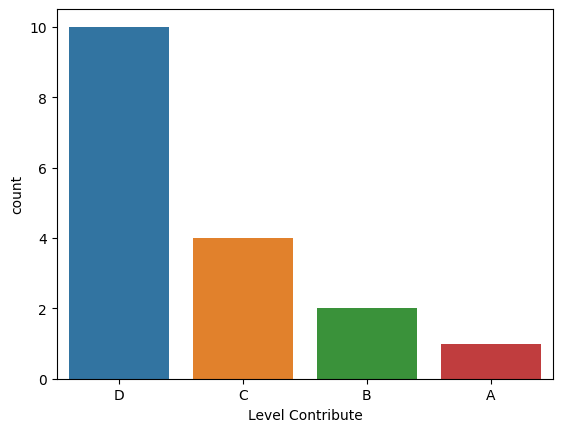

In [26]:
bins = [0, 10, 20, 30, 50]
labels = ['D', 'C', 'B', 'A']

df['Level Contribute'] = pd.cut(df['Total Reviews'], bins=bins, labels=labels)
# Visualisasi menggunakan count plot
sns.countplot(data=df, x='Level Contribute')

plt.show()


In [39]:
comments = df['Comment'].values.tolist()
translated_comments = []

# Menerjemahkan setiap elemen dalam list comments
for comment in comments:
    terjemahan = translator.translate(comment, src='id', dest='en')
    translated_comments.append(terjemahan.text)
    
print(translated_comments)


['This Sunday was open because I was around but it was closed huhu.His sister patiently asked us to need any improvement.Continue to be provided water for drinking and can even make your own coffee.Mas, the mechanic is also patient listening to ... others', 'The beginning of my story to AHAS, complained about Vario 150 wheels of rocking when driving, the employees want to check, the employee said the cause of the front wheel was already bald and had to be replaced, and I just said it, in my heart how the story ...', 'Fast service, queuing not long.Change the axle oil and the side of the cakek watwet.The location of the right front of Pertamina is delicious after service can be directly filled with gasoline', 'Rear brakes drag, piston and give a stamp ... the next day again ... want to go back again k repair shop eh it turns out that Friday is closed ...\nMoving KAHAS MPM Ngagel ... Change the brake master turns out to be \U0001fae3👌👍🏼 ...', 'Staff and mechanic are very friendly ... Aqu

In [43]:
neg = 0
pos = 0
not_both = 0


for comment in translated_comments:
    blob = TextBlob(comment)
    sentiment = blob.sentiment.polarity

    if sentiment > 0:
        pos += 1
    elif sentiment < 0:
        neg += 1
    else:
        not_both += 1
        
print("Pos : ", pos)
print("Neg : ", neg)
print("Not Both : ", not_both)

Pos :  11
Neg :  3
Not Both :  5
